### Weather data 2019 - Helsinki Kumupla

**Cloud amount:** Given in numbers out of eight: 0 = clear skies, 8 = overcast, 9 = cloud coverage could not be determined.

**Precipitation intensity:** Equivalent to the precipitation amount if the same intensity prevails for an hour. To get the true 10 minute precipitation amount, divide by 6.

**Wind speed:** The average wind speed during the previous 10 minutes.

**Snow depth:** Snow depth from automated weather stations. Accuracy +- 2 cm. <br />
~ Explanation for -1.0cm snow depth?

In [1]:
import pandas as pd
import numpy as np

data_1 = pd.read_csv('weather_2019_april_august.csv')
data_2 = pd.read_csv('weather_2019_september_october.csv')

data_1 = data_1.drop(len(data_1) - 1)
data_2 = data_2.drop(len(data_2) - 1)

In [2]:
data = pd.concat([data_1, data_2], ignore_index=True)

In [3]:
data = data.drop(columns=['Time zone', 'Snow depth (cm)'])

data.head(10)

,Year,m,d,Time,Cloud amount (1/8),Relative humidity (%),Precipitation intensity (mm/h),Air temperature (degC),Wind speed (m/s)
0,2019,4,1,00:00,0.0,77.0,0.0,-0.1,4.6
1,2019,4,1,00:10,0.0,77.0,0.0,0.0,4.8
2,2019,4,1,00:20,0.0,77.0,0.0,0.1,5.1
3,2019,4,1,00:30,0.0,77.0,0.0,0.1,4.9
4,2019,4,1,00:40,0.0,76.0,0.0,0.2,5.3
5,2019,4,1,00:50,0.0,77.0,0.0,0.0,5.0
6,2019,4,1,01:00,0.0,78.0,0.0,-0.1,5.1
7,2019,4,1,01:10,0.0,77.0,0.0,0.0,5.2
8,2019,4,1,01:20,0.0,77.0,0.0,0.0,5.0
9,2019,4,1,01:30,0.0,78.0,0.0,0.0,4.1


In [4]:
print('Number of data points:', len(data))

Number of data points: 30816


**Minimum and maximum**

In [5]:
cat = ['Cloud amount (1/8)', 'Relative humidity (%)', 'Precipitation intensity (mm/h)', 
       'Air temperature (degC)', 'Wind speed (m/s)']

for i in cat:
    print(i)
    print('Min:' + str(data[i].min()))
    print('Max:' + str(data[i].max()) + '\n')

Cloud amount (1/8)
Min:0.0
Max:9.0

Relative humidity (%)
Min:21.0
Max:100.0

Precipitation intensity (mm/h)
Min:0.0
Max:28.3

Air temperature (degC)
Min:-4.5
Max:33.1

Wind speed (m/s)
Min:0.0
Max:11.5



**Fill NaNs**

In [6]:
print(data['Cloud amount (1/8)'].isna().sum(), 'NaNs in Cloud amount')
print(data['Precipitation intensity (mm/h)'].isna().sum(), 'NaNs in Precipitation intensity')
print(data['Relative humidity (%)'].isna().sum(), 'NaNs in Relative humidity')
print(data['Air temperature (degC)'].isna().sum(), 'NaNs in Air temperature')
print(data['Wind speed (m/s)'].isna().sum(), 'NaNs in Wind speed')

20 NaNs in Cloud amount
24 NaNs in Precipitation intensity
20 NaNs in Relative humidity
20 NaNs in Air temperature
47 NaNs in Wind speed


In [7]:
types = ['Cloud amount (1/8)', 'Precipitation intensity (mm/h)', 'Relative humidity (%)',
            'Air temperature (degC)', 'Wind speed (m/s)']

for typ in types:
    for i in range(len(data)):
        if np.isnan(data[typ][i]):
            
            j = 1
            up = data[typ][i - j]
            while np.isnan(up):
                up = data[typ][i - j]
                j += 1
                
            k = 1
            down = data[typ][i + k]
            while np.isnan(down):
                down = data[typ][i + k]
                k += 1
                
            avg = (up + down) / 2
            data.loc[i, typ] = avg

In [8]:
print(data['Cloud amount (1/8)'].isna().sum(), 'NaNs in Cloud amount')
print(data['Precipitation intensity (mm/h)'].isna().sum(), 'NaNs in Precipitation intensity')
print(data['Relative humidity (%)'].isna().sum(), 'NaNs in Relative humidity')
print(data['Air temperature (degC)'].isna().sum(), 'NaNs in Air temperature')
print(data['Wind speed (m/s)'].isna().sum(), 'NaNs in Wind speed')

0 NaNs in Cloud amount
0 NaNs in Precipitation intensity
0 NaNs in Relative humidity
0 NaNs in Air temperature
0 NaNs in Wind speed


**Upscale data**

Copy data

In [9]:
data_5min = []

for i in range(len(data)):
    data_5min.append(data.iloc[i])
    data_5min.append(data.iloc[i])

In [10]:
index_5min = list(range(len(data_5min)))

data_5min = pd.DataFrame(data_5min, index=index_5min)

Adapt timestamp

In [12]:
for i in range(1, len(data_5min), 2):
    data_5min.loc[i, 'Time'] = data_5min['Time'][i][:-1] + '5'

In [13]:
data_5min

,Year,m,d,Time,Cloud amount (1/8),Relative humidity (%),Precipitation intensity (mm/h),Air temperature (degC),Wind speed (m/s)
0,2019,4,1,00:00,0.0,77.0,0.0,-0.1,4.6
1,2019,4,1,00:05,0.0,77.0,0.0,-0.1,4.6
2,2019,4,1,00:10,0.0,77.0,0.0,0.0,4.8
3,2019,4,1,00:15,0.0,77.0,0.0,0.0,4.8
4,2019,4,1,00:20,0.0,77.0,0.0,0.1,5.1
...,...,...,...,...,...,...,...,...,...
61627,2019,10,31,23:35,0.0,95.0,0.0,0.3,5.3
61628,2019,10,31,23:40,0.0,94.0,0.0,0.4,5.3
61629,2019,10,31,23:45,0.0,94.0,0.0,0.4,5.3
61630,2019,10,31,23:50,0.0,94.0,0.0,0.1,4.6


**Create timestamp**

In [15]:
months = [str(i).zfill(2) for i in data_5min['m']]
days = [str(i).zfill(2) for i in data_5min['d']]

In [17]:
timestamps = [str(data_5min['Year'][i]) + str(months[i]) + str(days[i]) + data_5min['Time'][i][:2] 
              + data_5min['Time'][i][3:] for i in range(len(data_5min))]

# timestamps = [str(data['Year'][i]) + '/' + str(months[i]) + '/' + str(days[i]) + ' ' + str(data['Time'][i]) + ':00'
#               for i in range(len(data))]

data_5min['Timestamp'] = pd.to_datetime(timestamps)

In [7]:
#data = data.drop(columns=['Year', 'm', 'd', 'Time'])

In [18]:
data_5min

,Year,m,d,Time,Cloud amount (1/8),Relative humidity (%),Precipitation intensity (mm/h),Air temperature (degC),Wind speed (m/s),Timestamp
0,2019,4,1,00:00,0.0,77.0,0.0,-0.1,4.6,2019-04-01 00:00:00
1,2019,4,1,00:05,0.0,77.0,0.0,-0.1,4.6,2019-04-01 00:05:00
2,2019,4,1,00:10,0.0,77.0,0.0,0.0,4.8,2019-04-01 00:10:00
3,2019,4,1,00:15,0.0,77.0,0.0,0.0,4.8,2019-04-01 00:15:00
4,2019,4,1,00:20,0.0,77.0,0.0,0.1,5.1,2019-04-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...
61627,2019,10,31,23:35,0.0,95.0,0.0,0.3,5.3,2019-10-31 23:35:00
61628,2019,10,31,23:40,0.0,94.0,0.0,0.4,5.3,2019-10-31 23:40:00
61629,2019,10,31,23:45,0.0,94.0,0.0,0.4,5.3,2019-10-31 23:45:00
61630,2019,10,31,23:50,0.0,94.0,0.0,0.1,4.6,2019-10-31 23:50:00


**Save as csv**

In [19]:
data.to_csv('weather_2019_prepared.csv')

In [20]:
data_5min.to_csv('weather_2019_upscale.csv')

### Some analysis

In [21]:
import matplotlib.pyplot as plt

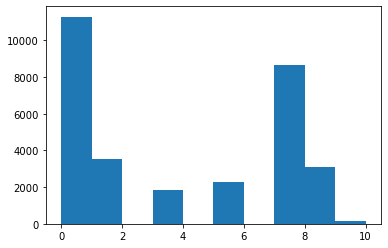

In [22]:
b = list(range(0, 11))

plt.hist(data['Cloud amount (1/8)'], bins=b)
plt.show()

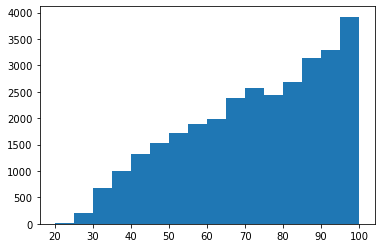

In [23]:
b = list(range(20, 105, 5))

plt.hist(data['Relative humidity (%)'], bins=b)
plt.show()

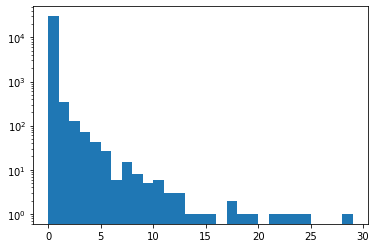

In [24]:
b = list(range(0, 30))

plt.hist(data['Precipitation intensity (mm/h)'], bins=b)
plt.yscale('log')
plt.show()

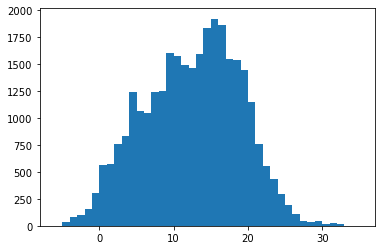

In [25]:
b = list(range(-6, 36, 1))

plt.hist(data['Air temperature (degC)'], bins=b)
plt.show()

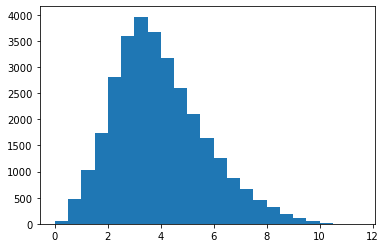

In [26]:
b = list(np.arange(0, 12, 0.5))

plt.hist(data['Wind speed (m/s)'], bins=b)
plt.show()